In [2]:
%load_ext lab_black

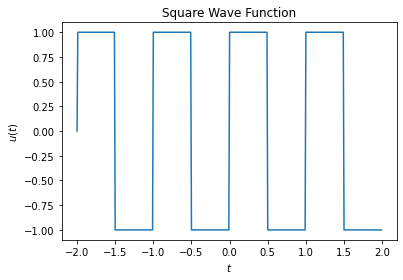

In [51]:
import matplotlib.pyplot as plt
import numpy as np

fs = 100
square_wave_function = lambda t: (abs((t % 1) - 0.25) < 0.25).astype(float) - (
    abs((t % 1) - 0.75) < 0.25
)

t = np.arange(-2, 2, 1 / fs)
plt.plot(t, square_wave_function(t))
plt.xlabel("$t$")
plt.ylabel("$u(t)$")
plt.title("Square Wave Function")
plt.savefig("square_wave_func.png")
plt.show()

In [52]:
def fourier_series(period, N):
    result = []
    T = len(period)
    t = np.arange(T)
    for n in range(N + 1):
        an = 2 / T * (period * np.cos(2 * np.pi * n * t / T)).sum()
        bn = 2 / T * (period * np.sin(2 * np.pi * n * t / T)).sum()
        result.append((an, bn))
    return np.array(result)


def reconstruct_signal(P, anbn):
    result = 0
    t = np.arange(P)
    for n, (a, b) in enumerate(anbn):
        if n == 0:
            a = a / 2
        result = (
            result
            + a * np.cos(2 * np.pi * n * t / P)
            + b * np.sin(2 * np.pi * n * t / P)
        )
    return result

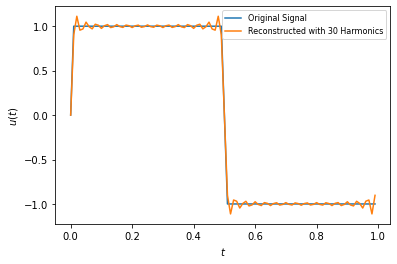

In [53]:
t_period = np.arange(0, 1, 1 / fs)
f = fourier_series(square_wave_function(t_period), fs)
plt.plot(t_period, square_wave_function(t_period), label="Original Signal")

plt.plot(
    t_period,
    reconstruct_signal(len(t_period), f[:30, :]),
    label="Reconstructed with 30 Harmonics",
)

plt.ylabel("$u(t)$")
plt.xlabel("$t$")
plt.legend(fontsize=8)
plt.savefig("reconstructed.png")
plt.show()